In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
d1 = pd.read_csv('diamonds01.csv') #데이터를 불러온다.
d2 = pd.read_csv('diamonds02.csv')

df_list = [d1,d2] #데이터 두개를 연결한다.
df = pd.concat(df_list, ignore_index=True)
df

,carat,cut,color,clarity,depth,table,x,y,z,price
0,0.38,Ideal,E,IF,62.7,55.0,4.61,4.67,2.91,1433
1,1.56,Ideal,F,SI2,61.6,56.0,7.41,7.45,4.58,10210
2,1.01,Ideal,J,SI2,61.9,55.3,6.43,6.50,4.01,4099
3,0.34,Ideal,H,SI1,62.6,56.0,4.46,4.48,2.80,490
4,0.40,Very Good,D,SI2,63.0,59.0,4.64,4.69,2.94,622
...,...,...,...,...,...,...,...,...,...,...
9995,1.51,Ideal,D,SI1,62.0,56.0,7.35,7.39,4.57,13162
9996,0.32,Ideal,D,VS2,62.6,55.0,4.37,4.39,2.74,758
9997,0.30,Ideal,I,VS1,62.4,54.0,4.30,4.32,2.69,491
9998,1.72,Premium,J,SI1,61.7,58.0,7.71,7.81,4.79,8324


In [2]:
#결측치 확인
df.isnull().sum()

carat      0
cut        0
color      0
clarity    0
depth      0
table      0
x          0
y          0
z          0
price      0
dtype: int64

In [3]:
df.head()

,carat,cut,color,clarity,depth,table,x,y,z,price
0,0.38,Ideal,E,IF,62.7,55.0,4.61,4.67,2.91,1433
1,1.56,Ideal,F,SI2,61.6,56.0,7.41,7.45,4.58,10210
2,1.01,Ideal,J,SI2,61.9,55.3,6.43,6.50,4.01,4099
3,0.34,Ideal,H,SI1,62.6,56.0,4.46,4.48,2.80,490
4,0.40,Very Good,D,SI2,63.0,59.0,4.64,4.69,2.94,622


C:\Users\wooji\AppData\Local\Temp\ipykernel_22512\2578288087.py:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df['price']) #가격의 그래프를 그려본다.


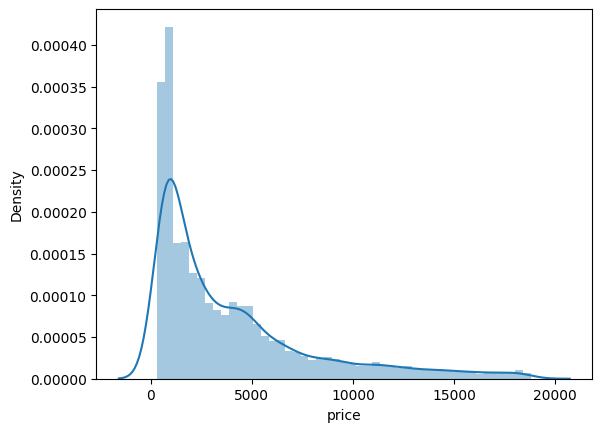

In [4]:
sns.distplot(df['price']) #가격의 그래프를 그려본다.
plt.show()

In [5]:
df['price'].describe() #가격의 분포도를 확인하여본다.

count    10000.00000
mean      3930.76480
std       3996.62607
min        326.00000
25%        947.00000
50%       2387.50000
75%       5251.25000
max      18823.00000
Name: price, dtype: float64

In [6]:
df['price_band'] = 0 #가격을 5단계로 나눈다.
df.loc[df['price']<=947,'price_band'] = 1
df.loc[(df['price']>947)&(df['price']<=2387),'price_band'] = 2
df.loc[(df['price']>2387)&(df['price']<=5251),'price_band'] = 3
df.loc[df['price']>5251,'price_band'] = 4
df.head(5)

,carat,cut,color,clarity,depth,table,x,y,z,price,price_band
0,0.38,Ideal,E,IF,62.7,55.0,4.61,4.67,2.91,1433,2
1,1.56,Ideal,F,SI2,61.6,56.0,7.41,7.45,4.58,10210,4
2,1.01,Ideal,J,SI2,61.9,55.3,6.43,6.50,4.01,4099,3
3,0.34,Ideal,H,SI1,62.6,56.0,4.46,4.48,2.80,490,1
4,0.40,Very Good,D,SI2,63.0,59.0,4.64,4.69,2.94,622,1


In [7]:
df['price_band'].value_counts().to_frame().style.background_gradient(cmap='summer') #제대로 분포되었는지 확인한다.

,price_band
1,2503
4,2500
3,2500
2,2497


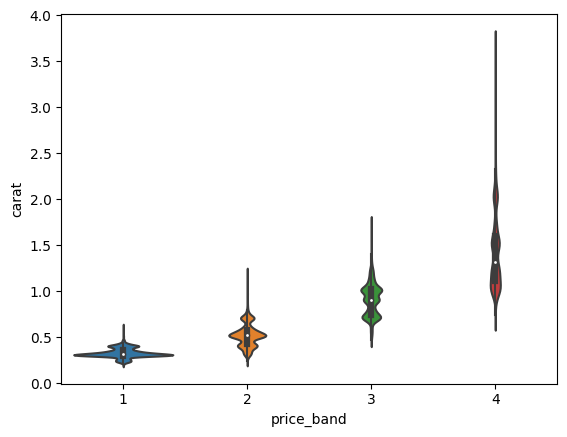

In [8]:
sns.violinplot(x="price_band", y="carat", data=df, jitter=True) #바이올린플롯으로 데이터의 분포를 확인한다.
plt.show()

In [9]:
def get_outlier(df=None, column=None, weight=1.5): #IQR 방식을 사용하여 이상치를 처리한다.
    quantile_25 = np.percentile(df[column].values, 25)
    quantile_75 = np.percentile(df[column].values, 75)
    
    IQR = quantile_75 - quantile_25
    IQR_weight = IQR*weight
    
    lowest = quantile_25 - IQR_weight
    highest = quantile_75 + IQR_weight
    outlier_idx = df[column][ (df[column] < lowest) | (df[column] > highest) ].index
    return outlier_idx

In [10]:
columns = ['carat', 'depth', 'table', 'x', 'y', 'z', 'price'] 

for i in columns:
    outlier_idx = get_outlier(df=df, column=i, weight=1.5)
    df.drop(outlier_idx, axis=0, inplace=True)

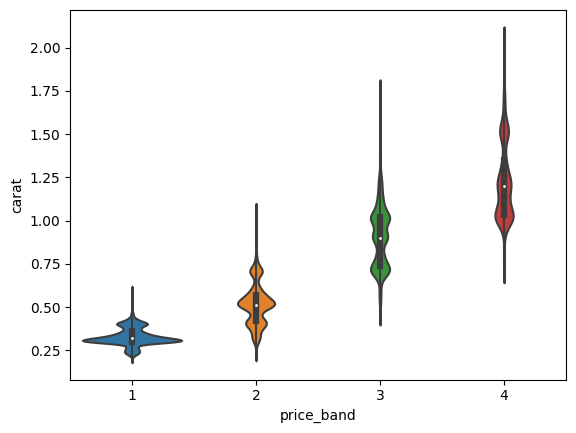

In [11]:
sns.violinplot(x="price_band", y="carat", data=df, jitter=True) #이상치 처리 확인
plt.show()

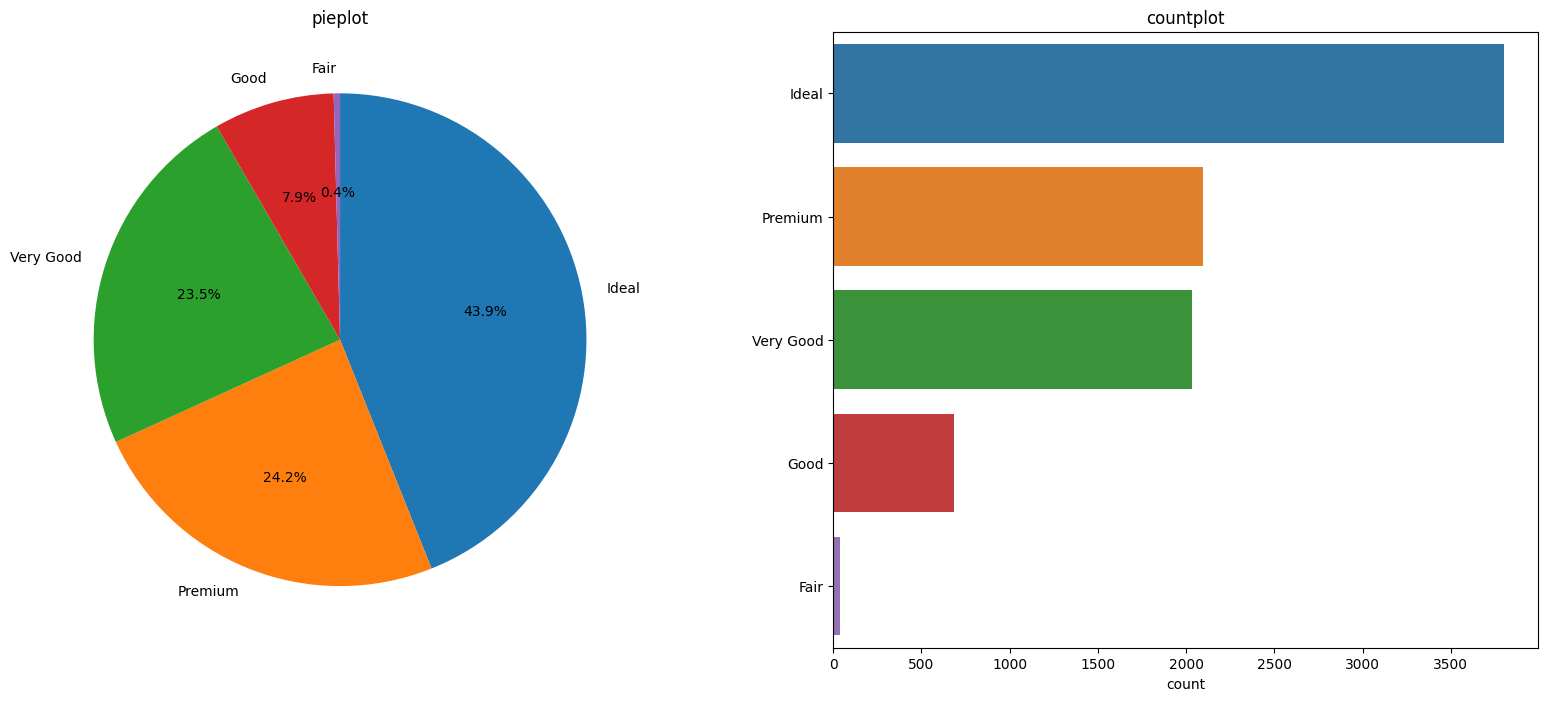

In [12]:
f,ax = plt.subplots(1,2,figsize=(20,8))
val = df['cut'].value_counts().values.tolist()
labels = df['cut'].value_counts().index.tolist()

df['cut'].value_counts().plot.pie( labels = labels, autopct='%.1f%%', counterclock=False, startangle= 90,ax = ax[0])
ax[0].set_ylabel('')
ax[0].set_title('pieplot')
sns.countplot(y = df['cut'],data=df['cut'],order=labels,ax=ax[1])
ax[1].set_ylabel('')
ax[1].set_title('countplot')
plt.show()

In [13]:
df['cut'].replace(['Ideal','Premium','Very Good','Good','Fair'],[1,2,3,4,5],inplace=True)
df

,carat,cut,color,clarity,depth,table,x,y,z,price,price_band
0,0.38,1,E,IF,62.7,55.0,4.61,4.67,2.91,1433,2
1,1.56,1,F,SI2,61.6,56.0,7.41,7.45,4.58,10210,4
2,1.01,1,J,SI2,61.9,55.3,6.43,6.50,4.01,4099,3
3,0.34,1,H,SI1,62.6,56.0,4.46,4.48,2.80,490,1
4,0.40,3,D,SI2,63.0,59.0,4.64,4.69,2.94,622,1
...,...,...,...,...,...,...,...,...,...,...,...
9994,0.96,3,F,SI1,60.6,62.0,6.35,6.39,3.86,4560,3
9996,0.32,1,D,VS2,62.6,55.0,4.37,4.39,2.74,758,1
9997,0.30,1,I,VS1,62.4,54.0,4.30,4.32,2.69,491,1
9998,1.72,2,J,SI1,61.7,58.0,7.71,7.81,4.79,8324,4


In [14]:
df['clarity'].unique()

array(['IF', 'SI2', 'SI1', 'VS1', 'VVS2', 'VS2', 'VVS1', 'I1'],
      dtype=object)

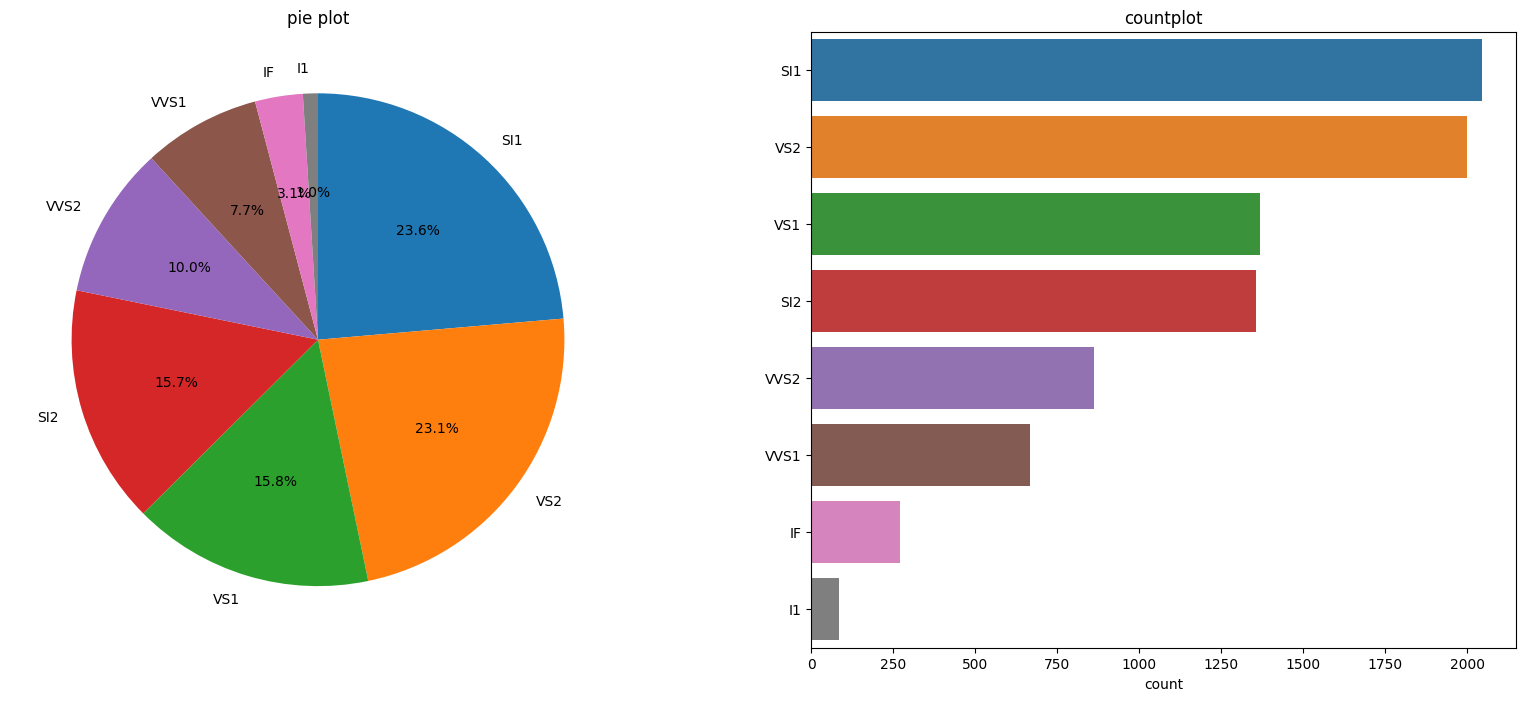

In [15]:
f,ax = plt.subplots(1,2,figsize=(20,8))
val = df['clarity'].value_counts().values.tolist()
labels = df['clarity'].value_counts().index.tolist()

df['clarity'].value_counts().plot.pie( labels = labels, autopct='%.1f%%', counterclock=False, startangle= 90,ax = ax[0])
ax[0].set_ylabel('')
ax[0].set_title('pie plot')
sns.countplot(y = df['clarity'],data=df['clarity'],order=labels,ax=ax[1])
ax[1].set_ylabel('')
ax[1].set_title('countplot')
plt.show()

In [16]:
df['clarity'].replace(['IF','VVS1','VVS2','VS1','VS2','SI1','SI2','I1'],[1,2,3,4,5,6,7,8],inplace=True)
df

,carat,cut,color,clarity,depth,table,x,y,z,price,price_band
0,0.38,1,E,1,62.7,55.0,4.61,4.67,2.91,1433,2
1,1.56,1,F,7,61.6,56.0,7.41,7.45,4.58,10210,4
2,1.01,1,J,7,61.9,55.3,6.43,6.50,4.01,4099,3
3,0.34,1,H,6,62.6,56.0,4.46,4.48,2.80,490,1
4,0.40,3,D,7,63.0,59.0,4.64,4.69,2.94,622,1
...,...,...,...,...,...,...,...,...,...,...,...
9994,0.96,3,F,6,60.6,62.0,6.35,6.39,3.86,4560,3
9996,0.32,1,D,5,62.6,55.0,4.37,4.39,2.74,758,1
9997,0.30,1,I,4,62.4,54.0,4.30,4.32,2.69,491,1
9998,1.72,2,J,6,61.7,58.0,7.71,7.81,4.79,8324,4


In [17]:
df['color'].unique()

array(['E', 'F', 'J', 'H', 'D', 'I', 'G'], dtype=object)

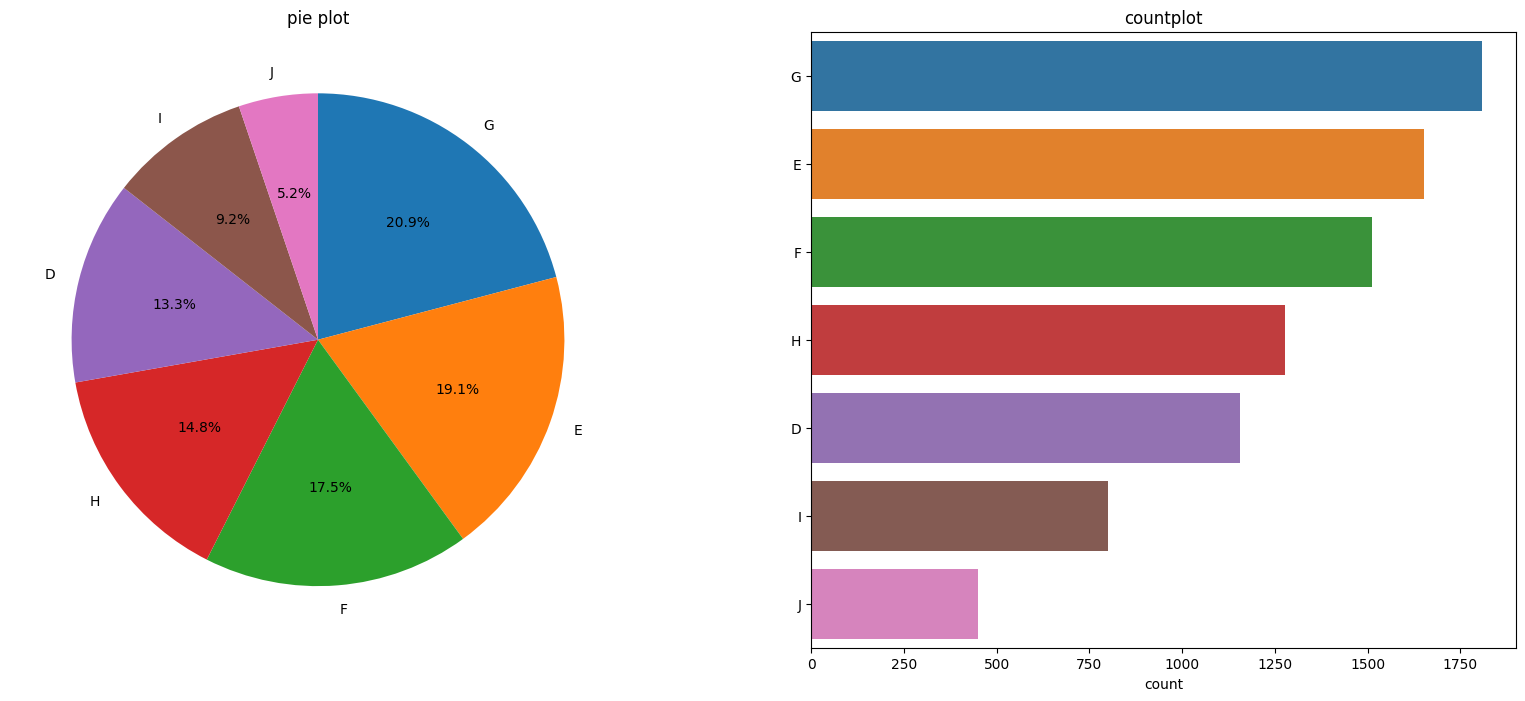

In [18]:
f,ax = plt.subplots(1,2,figsize=(20,8))
val = df['color'].value_counts().values.tolist()
labels = df['color'].value_counts().index.tolist()

df['color'].value_counts().plot.pie( labels = labels, autopct='%.1f%%', counterclock=False, startangle= 90,ax = ax[0])
ax[0].set_ylabel('')
ax[0].set_title('pie plot')
sns.countplot(y = df['color'],data=df['color'],order=labels,ax=ax[1])
ax[1].set_ylabel('')
ax[1].set_title('countplot')
plt.show()

In [19]:
df['color'].replace(['D','E','F','G','H','I','J'],[1,2,3,4,5,6,7],inplace=True)
df

,carat,cut,color,clarity,depth,table,x,y,z,price,price_band
0,0.38,1,2,1,62.7,55.0,4.61,4.67,2.91,1433,2
1,1.56,1,3,7,61.6,56.0,7.41,7.45,4.58,10210,4
2,1.01,1,7,7,61.9,55.3,6.43,6.50,4.01,4099,3
3,0.34,1,5,6,62.6,56.0,4.46,4.48,2.80,490,1
4,0.40,3,1,7,63.0,59.0,4.64,4.69,2.94,622,1
...,...,...,...,...,...,...,...,...,...,...,...
9994,0.96,3,3,6,60.6,62.0,6.35,6.39,3.86,4560,3
9996,0.32,1,1,5,62.6,55.0,4.37,4.39,2.74,758,1
9997,0.30,1,6,4,62.4,54.0,4.30,4.32,2.69,491,1
9998,1.72,2,7,6,61.7,58.0,7.71,7.81,4.79,8324,4


In [20]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 8654 entries, 0 to 9999
Data columns (total 11 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   carat       8654 non-null   float64
 1   cut         8654 non-null   int64  
 2   color       8654 non-null   int64  
 3   clarity     8654 non-null   int64  
 4   depth       8654 non-null   float64
 5   table       8654 non-null   float64
 6   x           8654 non-null   float64
 7   y           8654 non-null   float64
 8   z           8654 non-null   float64
 9   price       8654 non-null   int64  
 10  price_band  8654 non-null   int64  
dtypes: float64(6), int64(5)
memory usage: 1.0 MB


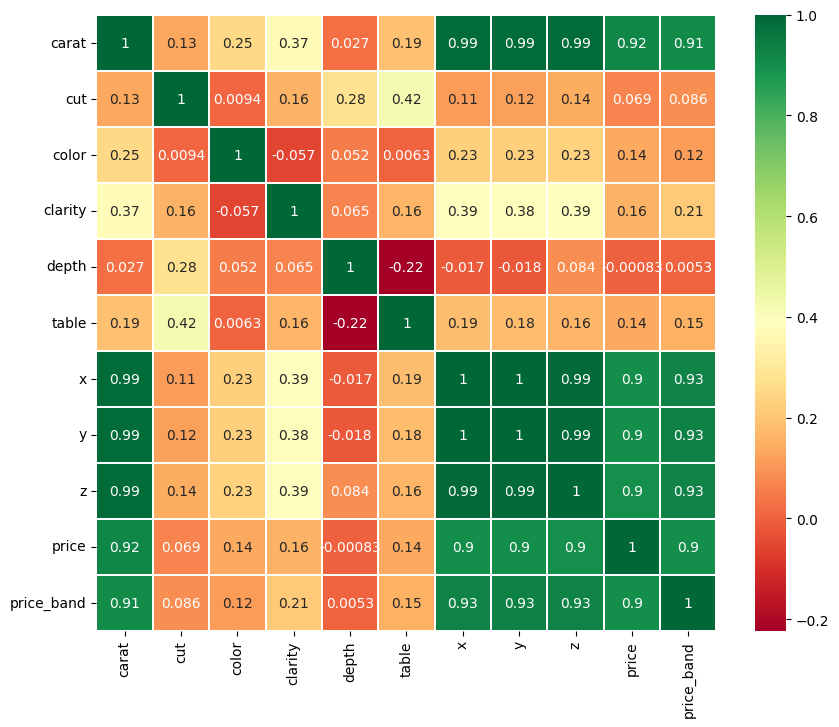

In [21]:
sns.heatmap(df.corr(),annot=True,cmap='RdYlGn',linewidths=0.2)
fig=plt.gcf()
fig.set_size_inches(10,8)
plt.show()

In [22]:
df = df.drop(['depth'],axis = 1)
df.head(5)

,carat,cut,color,clarity,table,x,y,z,price,price_band
0,0.38,1,2,1,55.0,4.61,4.67,2.91,1433,2
1,1.56,1,3,7,56.0,7.41,7.45,4.58,10210,4
2,1.01,1,7,7,55.3,6.43,6.50,4.01,4099,3
3,0.34,1,5,6,56.0,4.46,4.48,2.80,490,1
4,0.40,3,1,7,59.0,4.64,4.69,2.94,622,1


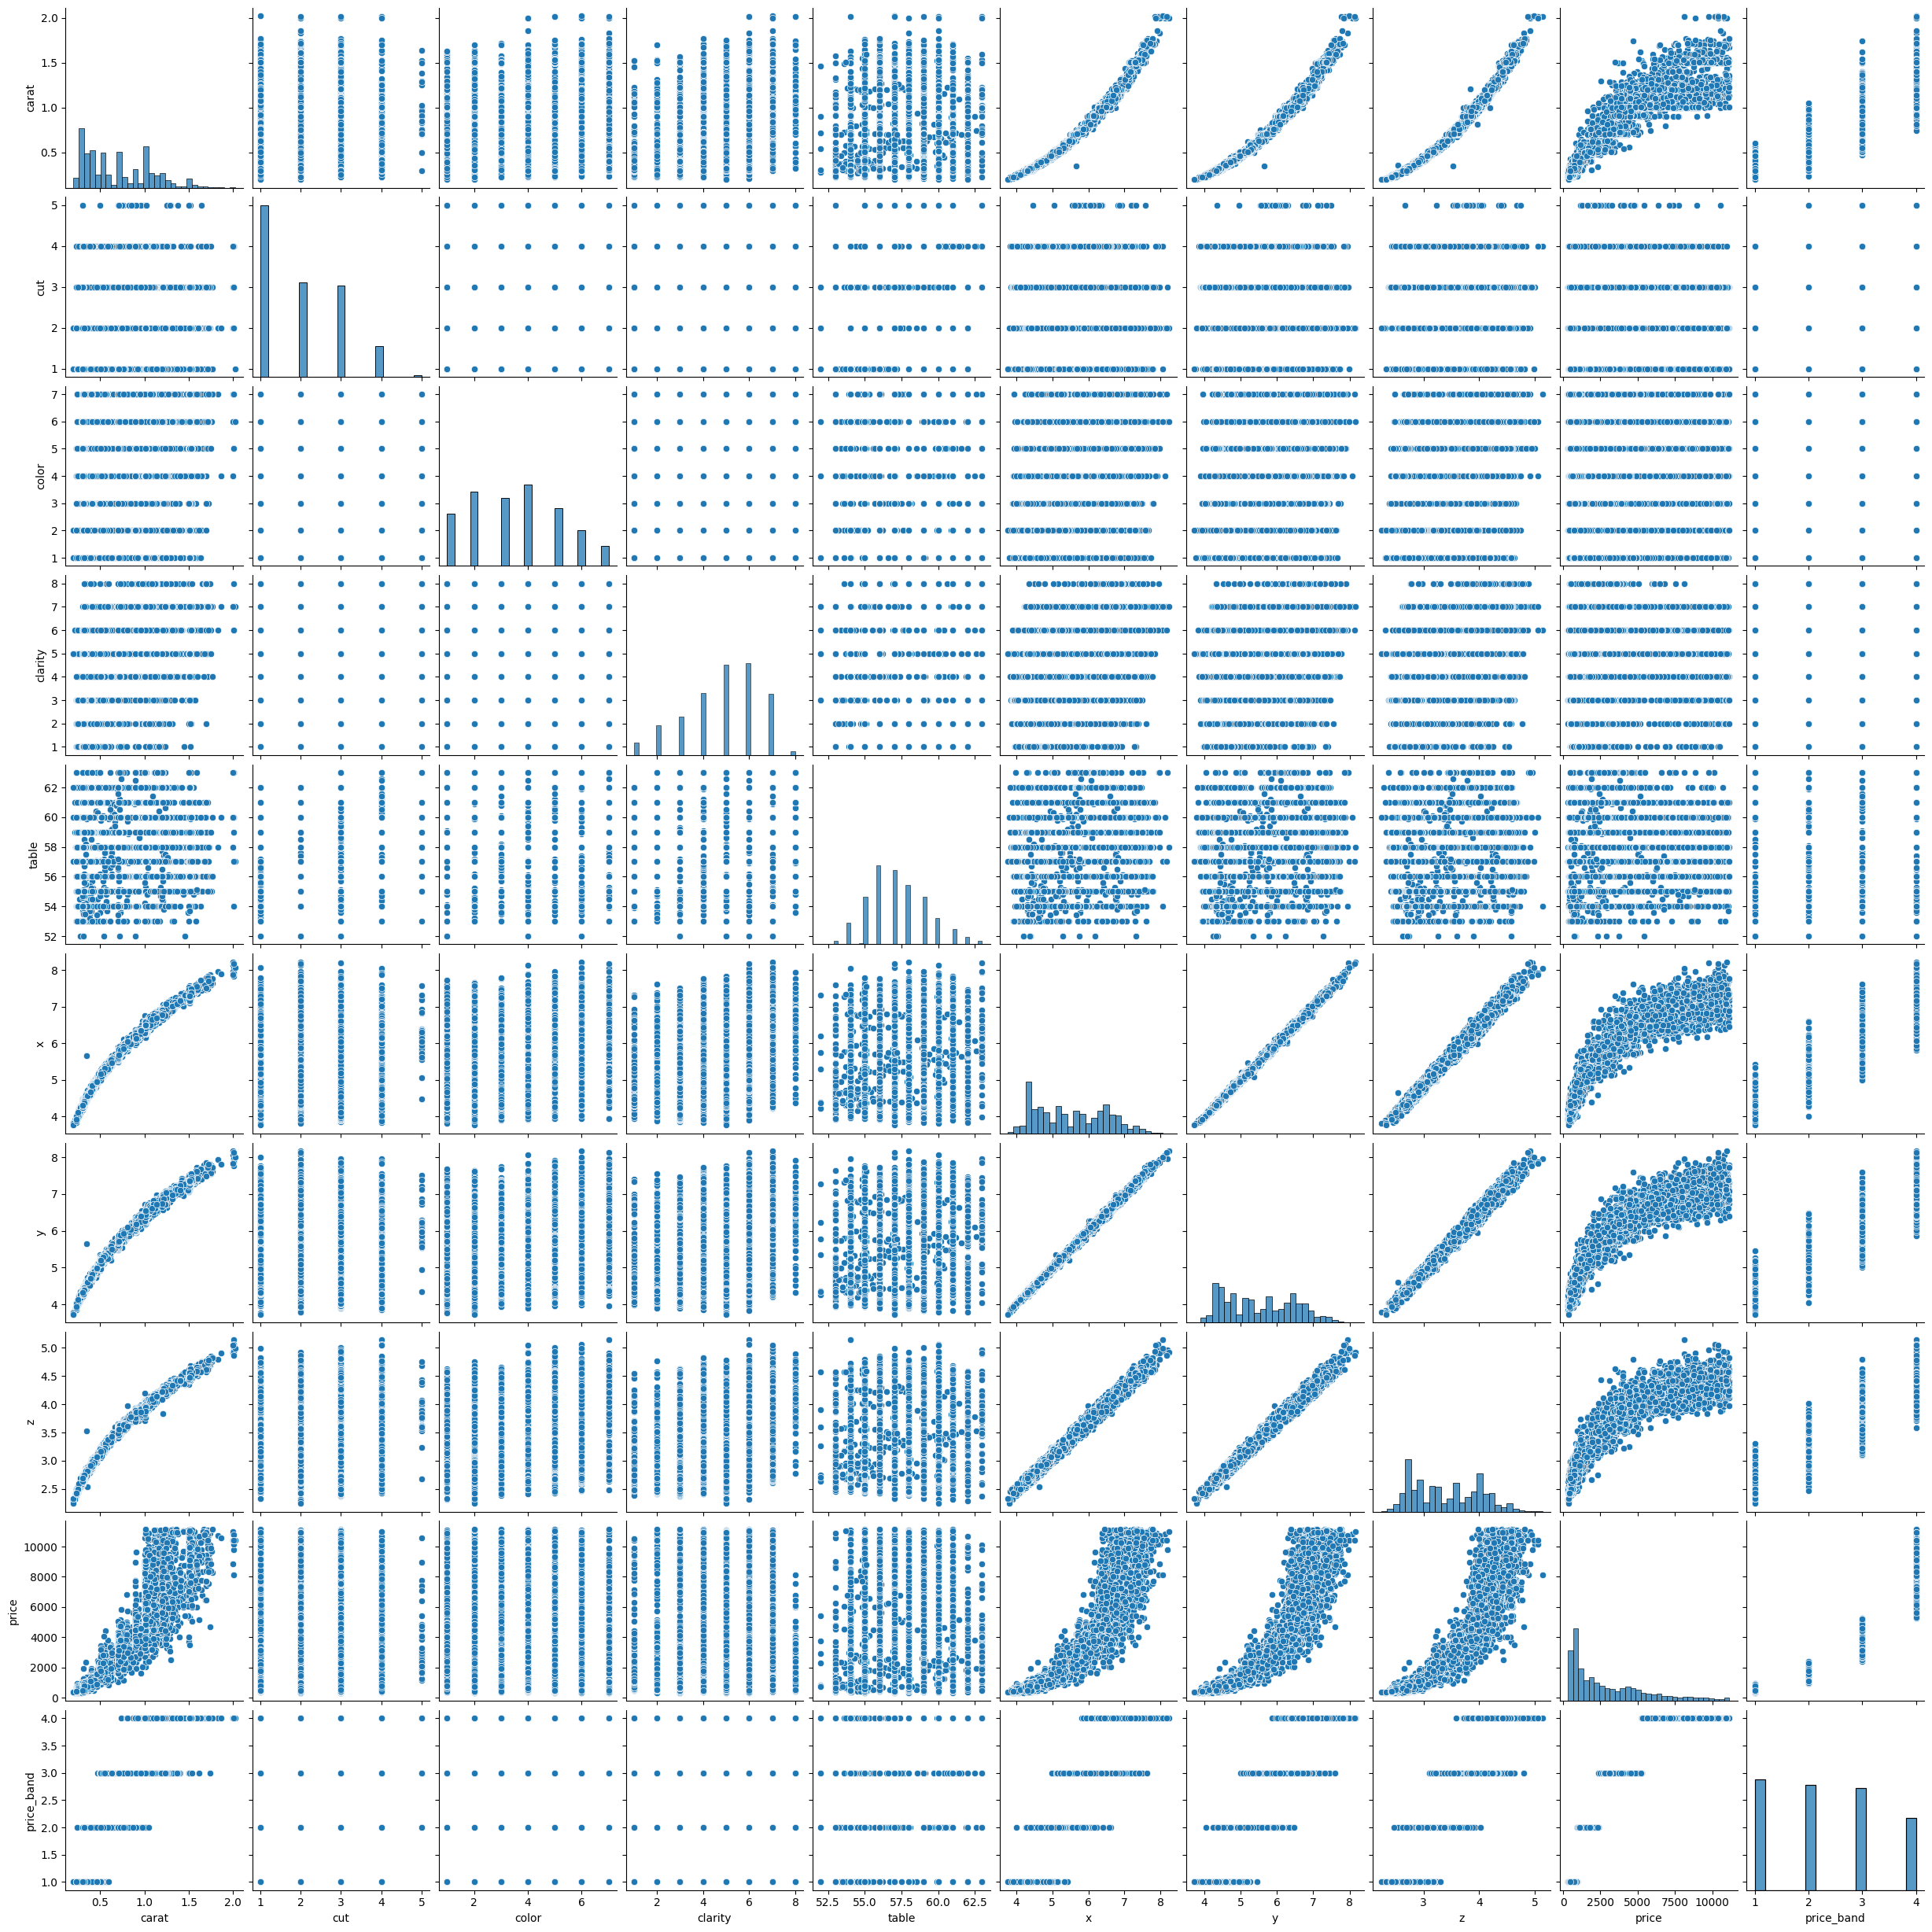

In [23]:
sns.pairplot(data=df)
plt.show()

In [24]:
data = df.drop('price', axis=1).values
target = df['price'].values

In [25]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(data, target, random_state=1)

In [26]:
from sklearn.linear_model import LinearRegression
lr = LinearRegression()
lr.fit(X_train,y_train)

LinearRegression()

In [27]:
print(lr.score(X_train,y_train))
print(lr.score(X_test,y_test))

0.922023966025439
0.9204886230050735


Linear Regression : 0.9204886230050735

In [28]:
from sklearn.preprocessing import PolynomialFeatures 

poly = PolynomialFeatures(degree = 5, include_bias=False) #최고 차수를 5제곱까지 특성을 만든다.
poly.fit(X_train)
train_poly = poly.transform(X_train)
test_poly = poly.transform(X_test)
print(train_poly.shape)

(6490, 2001)


In [29]:
lr.fit(train_poly,y_train)
print(lr.score(train_poly,y_train))

0.9926657145715048


In [30]:
print(lr.score(test_poly,y_test)) #과대적합, 규제 필요

-49.407123144874454


In [31]:
from sklearn.preprocessing import StandardScaler
ss = StandardScaler()
ss.fit(train_poly)
train_scaled = ss.transform(train_poly)
test_scaled = ss.transform(test_poly)

In [32]:
#릿지 회귀 규제
from sklearn.linear_model import Ridge
ridge = Ridge()
ridge.fit(train_scaled, y_train)
print(ridge.score(train_scaled, y_train))

0.9847644868961858


In [33]:
print(ridge.score(test_scaled, y_test)) #정상

0.9828493196645409


In [34]:
#최적의 alpha 값 찾기
import matplotlib.pyplot as plt
train_score = []
test_score = []

In [35]:
alpha_list = [0.0001,0.001,0.01,0.1,1,10] #10배씩 늘리기
for alpha in alpha_list:
    ridge = Ridge(alpha = alpha)
    ridge.fit(train_scaled, y_train)
    train_score.append(ridge.score(train_scaled, y_train))
    test_score.append(ridge.score(test_scaled, y_test))

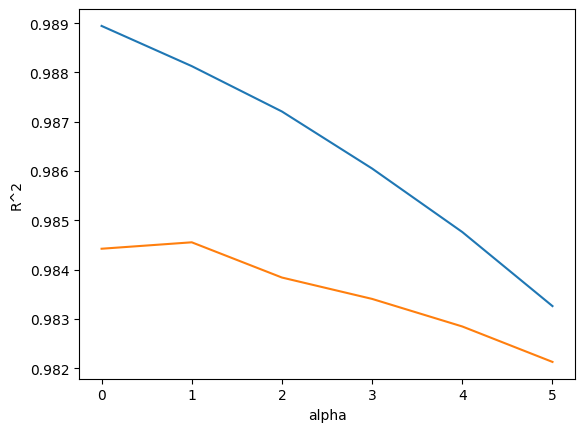

In [36]:
plt.plot(train_score)
plt.plot(test_score)
plt.xlabel('alpha')
plt.ylabel('R^2')
plt.show()

In [37]:
ridge = Ridge(alpha = 0.001)
ridge.fit(train_scaled, y_train)
print(ridge.score(train_scaled, y_train))
print(ridge.score(test_scaled, y_test))

0.9881291432129508
0.9845564091367882


※ Ridge Regression : 0.9845564091367882

In [38]:
from sklearn.neighbors import KNeighborsRegressor
knr = KNeighborsRegressor()

knr.n_neighbors = 3
knr.fit(X_train, y_train)
print(knr.score(X_train, y_train))
print(knr.score(X_test, y_test))

0.9745042875122241
0.9469120798424219


In [39]:
train_score = []
test_score = []
n_list = [i for i in range(1,10)]
for i in n_list:
    knr = KNeighborsRegressor(n_neighbors = i)
    knr.fit(X_train, y_train)
    train_score.append(knr.score(X_train, y_train))
    test_score.append(knr.score(X_test, y_test))

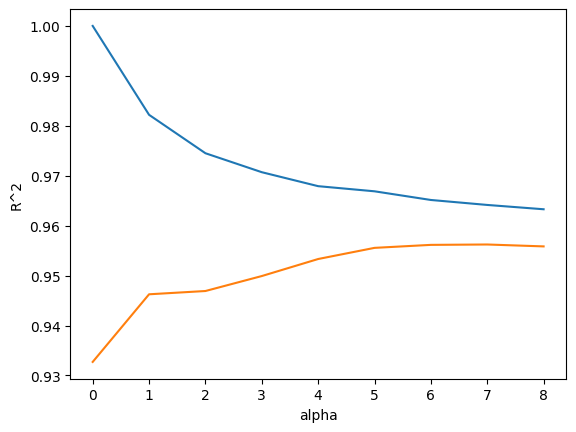

In [40]:
plt.plot(train_score)
plt.plot(test_score)
plt.xlabel('alpha')
plt.ylabel('R^2')
plt.show()

In [41]:
knr.n_neighbors = 7
knr.fit(X_train, y_train)
print(knr.score(X_train, y_train))
print(knr.score(X_test, y_test))

0.9651434647019813
0.9561524369592704


※ KNeighbors Regressor : 0.9561524369592704

In [42]:
from sklearn.preprocessing import StandardScaler
ss = StandardScaler()
ss.fit(X_train)
train_scaled = ss.transform(X_train)
test_scaled = ss.transform(X_test)

In [43]:
from sklearn.linear_model import SGDRegressor
sg = SGDRegressor(max_iter=100,random_state=1, verbose=1)
sg.fit(train_scaled, y_train)
print(sg.score(train_scaled, y_train))
print(sg.score(test_scaled, y_test))

-- Epoch 1
Norm: 1451.24, NNZs: 9, Bias: 2983.663552, T: 6490, Avg. loss: 494858.940106
Total training time: 0.00 seconds.
-- Epoch 2
Norm: 1662.92, NNZs: 9, Bias: 2980.455564, T: 12980, Avg. loss: 347833.557664
Total training time: 0.00 seconds.
-- Epoch 3
Norm: 1768.54, NNZs: 9, Bias: 2986.610941, T: 19470, Avg. loss: 332166.431019
Total training time: 0.00 seconds.
-- Epoch 4
Norm: 1936.22, NNZs: 9, Bias: 3000.328719, T: 25960, Avg. loss: 322099.350898
Total training time: 0.00 seconds.
-- Epoch 5
Norm: 2104.00, NNZs: 9, Bias: 3017.983184, T: 32450, Avg. loss: 313429.751257
Total training time: 0.00 seconds.
-- Epoch 6
Norm: 2238.63, NNZs: 9, Bias: 3002.562062, T: 38940, Avg. loss: 306298.159850
Total training time: 0.00 seconds.
-- Epoch 7
Norm: 2339.57, NNZs: 9, Bias: 2989.630382, T: 45430, Avg. loss: 301324.351061
Total training time: 0.00 seconds.
-- Epoch 8
Norm: 2441.94, NNZs: 9, Bias: 2995.570836, T: 51920, Avg. loss: 296706.508186
Total training time: 0.01 seconds.
-- Epoch 

※ SGD Regressor : 0.9203841040551763

In [44]:
from sklearn.ensemble import RandomForestRegressor
rf = RandomForestRegressor()
rf.fit(X_train, y_train)

RandomForestRegressor()

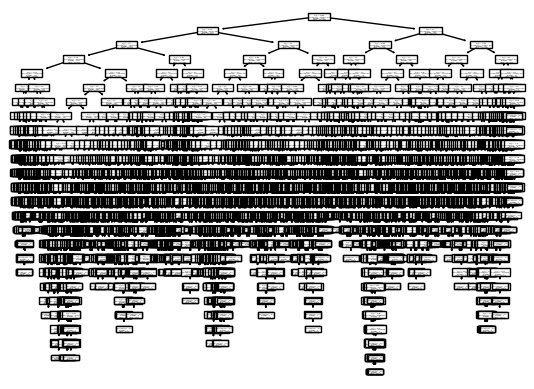

In [45]:
from sklearn.tree import plot_tree
rfTree= rf.estimators_[0]
plot_tree(rfTree)
plt.show()

In [46]:
print(rf.score(X_train,y_train))
print(rf.score(X_test,y_test))

0.9978395442708979
0.9832428818015038


※ RandomForest Regressor : 0.9833635592249881

In [47]:
from lightgbm import LGBMRegressor
lgbm = LGBMRegressor(max_depth=-1,random_state=1)

from sklearn.model_selection import GridSearchCV
param_lgbm = {
    "learning_rate" : [0.01,0.02,0.03],
    "n_estimators" : [10000],
    "subsample" : [0.1,0.3]
    }
gscv_lgbm = GridSearchCV(estimator = lgbm, param_grid = param_lgbm, cv = 5, refit=True, verbose=1)
gscv_lgbm.fit(X_train, y_train)

Fitting 5 folds for each of 6 candidates, totalling 30 fits


GridSearchCV(cv=5, estimator=LGBMRegressor(random_state=1),
             param_grid={'learning_rate': [0.01, 0.02, 0.03],
                         'n_estimators': [10000], 'subsample': [0.1, 0.3]},
             verbose=1)

In [48]:
print('lgbm 파라미터: ', gscv_lgbm.best_params_)
print('lgbm 예측 정확도: ', gscv_lgbm.best_score_)

lgbm 파라미터:  {'learning_rate': 0.01, 'n_estimators': 10000, 'subsample': 0.1}
lgbm 예측 정확도:  0.9836508605320011


※ LGBM Regressor : 0.9836508605320011